<a href="https://colab.research.google.com/github/gumagau/almabetter-final-project-netflix-unsupervised/blob/main/Copy_of_Netflix_Movies_And_Tv_Shows_Clustering_ipynb_Gautam_Mohanty_resubmitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Name : Netflix Movies and TV Shows Clustering**
# Project Type unsupervised ML

# Batch : Cohort Seoul

# **Problem Statement**

 The problem statement revolves around improving the Netflix experience for users by understanding their preferences and viewing habits. By analyzing data on what users watch and how they interact with the platform, the goal is to enhance Netflix's recommendation algorithms. This can lead to better personalized recommendations, ultimately increasing user satisfaction and engagement with the platform.

# Project summary

**With more than 83 million subscribers and presence in more than 190 countries, Netflix is the most popular Internet television network in the world. Its users watch more than 125 million hours of TV and movie content daily, including original series, documentaries, and feature films. On almost any screen that is linked to the Internet, members can watch as much as they want, whenever and wherever. Without interruptions or obligations, members can play, pause, and resume watching at any time.**

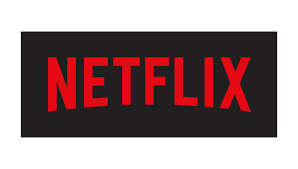

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <font size="+2" color='#154085'><b>5. Data Preparation *(nlp data)*

### 5.1 **description**

In [ ]:
df.columns

In [ ]:
df.description.iloc[0]

In [ ]:
First_des = df.description.iloc[0]
First_des

* #### 5.1.1 Importing necessary libraries

In [ ]:
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [ ]:
! pip install nltk

import nltk

* #### <b>5.1.2 Removing punctuations

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
df['description'] = df['description'].apply(remove_punctuation)
df.head()

* #### <b> 5.1.3 Removing stopwords

In [ ]:
# importing nltk library
import nltk
# downloading the stopwords from nltk
nltk.download('stopwords')
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
for i in sw:
  print(i , end=',  ')

In [ ]:
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
# displaying the stopwords
for i in sw:
  print(i , end=',  ')

In [ ]:
print("Number of stopwords in english : ", len(sw))

In [ ]:
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)

In [ ]:
df['description'] = df['description'].apply( remove_stopwords )
df.head()

Now all the values of description are punctutation free ans stopword free

* #### 5.1.4 Using **CountVectorizer()** to count vocabulary items

In [ ]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['description'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [ ]:
dictionary

In [ ]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

* Creating a new *DataFrame* **vocab_before_stemming**

In [ ]:
# Store the count in panadas dataframe with vocab as index
vocab_before_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_before_stemming = vocab_before_stemming.sort_values("count" ,ascending=False)

In [ ]:
vocab_before_stemming.head(4)

In [ ]:
vocab_before_stemming.head(20).T

In [ ]:
vocab_before_stemming.tail(4)

* TOP 10 most occurred words

In [ ]:
top15_most_ocurred_vacab = vocab_before_stemming.head(15)

In [ ]:
top15_most_occurred_words = top15_most_ocurred_vacab.Word.values
top15_most_occurred_words

In [ ]:
top15_most_occurred_words_count = top15_most_ocurred_vacab['count'].values
top15_most_occurred_words_count

In [ ]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(19550, 19600)
plt.barh(top15_most_occurred_words , top15_most_occurred_words_count )

* #### 5.1.5 Now will use **SnowballStemmer( 'english' )**

In [ ]:
# Create an object of stemming function
stemmer = SnowballStemmer("english")

In [ ]:
def Apply_stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
#Stemming for description
df['description'] = df['description'].apply( Apply_stemming )
df.head()

* #### 5.1.6 Now again will use **TfidfVectorizer** *(after stemming)*

In [ ]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(df['description'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [ ]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

* Creating a new *DataFrame* **vocab_after_stemming**

In [ ]:
# Store the count in panadas dataframe with vocab as index
vocab_after_stemming = pd.DataFrame({"Word": vocab ,
                                      "count" :count_of_vocab})
# Sort the dataframe
vocab_after_stemming = vocab_after_stemming.sort_values("count" ,ascending=False)

In [ ]:
top15_most_ocurred_vocab = vocab_after_stemming.head(15)

In [ ]:
top15_most_occurred_words = top15_most_ocurred_vocab.Word.values
top15_most_occurred_words

In [ ]:
top15_most_occurred_words_count = top15_most_ocurred_vocab['count'].values
top15_most_occurred_words_count

In [ ]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(14225, 14241)
plt.barh(top15_most_occurred_words , top15_most_occurred_words_count )

* #### 5.1.7 Adding a new column **length** which will contain length of description

In [ ]:
df['Length(description)'] = df['description'].apply(lambda x: len(x))

In [ ]:
df.head(3)

In [ ]:
df.description.iloc[0]

In [ ]:
len(df.description.iloc[0])

* ### 5.2 **listed_in**

* #### 5.2.1 Removing punctutations

In [ ]:
df.columns

In [ ]:
df['listed_in'] = df['listed_in'].apply(remove_punctuation)
df.head()

* #### 5.2.2 Removing stopwords

In [ ]:
#Remove stopwords for listed_in
df['listed_in'] = df['listed_in'].apply( remove_stopwords )
df.head( 2 )

* #### 5.2.3 Using **CountVectorizer()** to count vocabulary items

In [ ]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['listed_in'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [ ]:
dictionary

In [ ]:
vocab = [ ]
count_of_vocab = []
for key , value in dictionary:
  vocab.append( key )
  count_of_vocab.append( value )

In [ ]:
listed_in_vocab_before_stem = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})

listed_in_vocab_before_stem = listed_in_vocab_before_stem.sort_values("count" ,ascending=False)

In [ ]:
listed_in_vocab_before_stem.head()

In [ ]:
listed_in_vocab_before_stem.tail()

* TOP 10 most occurred words in listed in

In [ ]:
top15_most_ocurred_vocab_listed_in = listed_in_vocab_before_stem.head(15)

In [ ]:
top15_most_ocurred_words_listed_in = top15_most_ocurred_vocab_listed_in.Word.values
top15_most_ocurred_words_listed_in

In [ ]:
top15_most_occurred_words_in_listed_in_count = top15_most_ocurred_vocab_listed_in['count'].values
top15_most_occurred_words_in_listed_in_count

In [ ]:
plt.figure( figsize = ( 10,6 ))
plt.xlim(25, 42 )
plt.barh(top15_most_ocurred_words_listed_in , top15_most_occurred_words_in_listed_in_count )

* #### 5.2.4 Now will use **SnowballStemmer( 'english' )**

In [ ]:
#Stemming for description
df['listed_in'] = df['listed_in'].apply( Apply_stemming )
df.head(3)

* #### 5.2.5 Now will use **TfidfVectorizer** *(after stemming)*( TFIDF ) Bag Of Words

In [ ]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(df['listed_in'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [ ]:
dictionary

In [ ]:
# Lists to store the vocab and counts
vocab = []
count_of_vocab = []
# Iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count_of_vocab.append(value)

* Creating a new *DataFrame* **vocab_after_stemming_listed_in**

In [ ]:
vocab_after_stemming_listed_in = pd.DataFrame({"Word": vocab , "count" :count_of_vocab})
# Sort the dataframe by count
vocab_after_stemming_listed_in = vocab_after_stemming_listed_in.sort_values("count" ,ascending=False)

In [ ]:
top15_most_ocurred_vocab_lised_in_after_stem = vocab_after_stemming_listed_in.head(15)

In [ ]:
top15_most_ocurred_vocab_lised_in_after_stem_word = top15_most_ocurred_vocab_lised_in_after_stem.Word.values
top15_most_ocurred_vocab_lised_in_after_stem_word

In [ ]:
top15_most_occurred_words_listed_in_count = top15_most_ocurred_vocab_lised_in_after_stem['count'].values
top15_most_occurred_words_listed_in_count

* Plot of the top vocab present in listed_in (after stemming)

In [ ]:
plt.figure( figsize = ( 10,6 ))
plt.xlim(25, 40 )
plt.barh(top15_most_ocurred_vocab_lised_in_after_stem_word , top15_most_occurred_words_listed_in_count )

* #### 5.2.6 Adding a new column **length( listed-in )** which will contain length of listed_in

In [ ]:
df['Length(listed-in)'] = df['listed_in'].apply(lambda x: len(x))
df.head(3)

In [ ]:
df.columns

In [ ]:
df[['description', 'Length(description)', 'listed_in' ,'Length(listed-in)' ]].head(3)


##Exploratory Data Analysis Conclusions
---
---
> * **Netflix began adding videos to the platform from 2008**
> * **The streaming giant started aggressively adding movies and TV shows from 2017**
> * **More movies are added as compared to TV shows**
---
> * **There are almost twice as many movies as TV shows on Netflix.**
---
> * **Most content on Netflix is rated for Mature Audiences and over 14 years old**
---
> **Top Countries in Netflix are:**
1. **United States**
2. **India**
3. **United Kingdom**
4. **Canada**
5. **France**

---
> **Top Genres in Netflix are:**
1. **Drama**
2.**Comedy**
3.**Documentary**
4.**Action and Adventure**
5.**Romance**

---
> **Top Directors on Netflix are:**
1. **Jan Suter**
2.**Raul Campos**
3.**Marcus Raboy**
4.**Jay Karas**
5.**Cathy Garcia-Molina**

---
> **Top Actors on Netflix are:**
1. **Anupam Kher**
2.**Shah Rukh Khan**
3.**Naseeruddin Shah**
4.**Om Puri**
5.**Akshay Kumar**

---
> * **Most movies on Netflix have a duration range from 90 to 110 minutes**
---
> * **Most TV shows on Netflix have a span of only one season**.
---

## <font size='+2' color = '#154085'> <B> End Conclusion.</b>

1. Director and cast contains a large number of null values so we will drop these 2 columns .
2. In this dataset there are two types of contents where 30.86% includes TV shows and the
remaining 69.14% carries Movies.
3. We have reached a conclusion from our analysis from the content added over years that
Netflix is focusing movies and TV shows (Fom 2016 data we get to know that Movies is
increased by 80% and TV shows is increased by 73% compare)
4. From the dataset insights we can conclude that the most number of TV Shows released in
2017 and for Movies it is 2020
5. On Netflix USA has the largest number of contents. And most of the countries preferred to
produce movies more than TV shows.
6. Most of the movies are belonging to 3 categories
7. TOP 3 content categories are International movies , dramas , comedies.
8. In text analysis (NLP) I used stop words, removed punctuations , stemming & TF-IDF
vectorizer and other functions of NLP.
9. Applied different clustering models like Kmeans, hierarchical, Agglomerative clustering,
DBSCAN on data we got the best cluster arrangements.
10.By applying different clustering algorithms to our dataset .we get the optimal number of
cluster is equal to 3
